In [2]:
import pandas as pd
import seaborn as sns
from glob import glob

# EC2 experiments
## T2-medium instance

### Caching with uncompressed files
#### 1 file 1 repetition

In [5]:
def fig_cached(cache, uncached):
    df = pd.concat([pd.read_csv(f) for f in glob(cache)])
    df_start = df[df["action"].str.contains("start")].reset_index()
    df_end = df[df["action"].str.contains("end")].reset_index()

    df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
    df_start["start"] = df_start["timestamp"]
    df_end["end"] = df_end["timestamp"]

    df_cached = pd.concat([df_start, df_end], axis=1)
    df_cached["task_runtime"] = (df_cached["end"] - df_cached["start"]) * 10**-9
    df_cached = df_cached[["task", "task_runtime"]]
    df_cached["cached"] = True

    df = pd.concat([pd.read_csv(f) for f in glob(uncached)])
    df_start = df[df["action"].str.contains("start")].reset_index()
    df_end = df[df["action"].str.contains("end")].reset_index()

    df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
    df_start["start"] = df_start["timestamp"]
    df_end["end"] = df_end["timestamp"]

    df_ncached = pd.concat([df_start, df_end], axis=1)
    df_ncached["task_runtime"] = (df_ncached["end"] - df_ncached["start"]) * 10**-9
    df_ncached = df_ncached[["task", "task_runtime"]]
    df_ncached["cached"] = False

    df = pd.concat([df_cached, df_ncached])

    ax = sns.barplot(x="task", y="task_runtime", data=df, hue="cached")


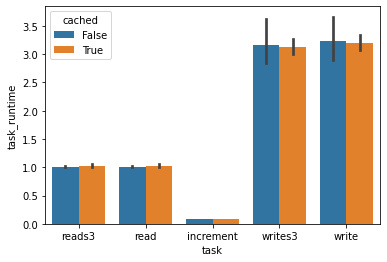

In [6]:
fig_cached("../results/ec2-t2medium/conditions-cache/rep-*/benchmark_1i_1f_cache*_sequential*",
           "../results/ec2-t2medium/conditions-cache/rep-*/benchmark_1i_1f_nocache*_sequential*")

#### 1 file 5 repetitions

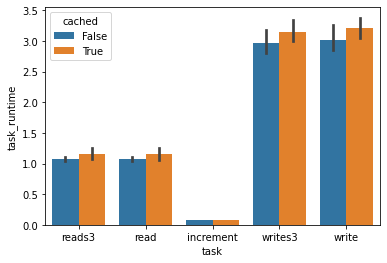

In [7]:
fig_cached("../results/ec2-t2medium/conditions-cache/rep-*/benchmark_5i_1f_cache*_sequential*",
           "../results/ec2-t2medium/conditions-cache/rep-*/benchmark_5i_1f_nocache*_sequential*")

#### 1 file 10 repetitions

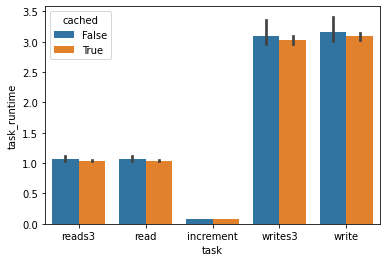

In [9]:
fig_cached("../results/ec2-t2medium/conditions-cache/rep-*/benchmark_10i_1f_cache*_sequential*",
           "../results/ec2-t2medium/conditions-cache/rep-*/benchmark_10i_1f_nocache*_sequential*")

### I/O Benchmarks with multiple files

In [14]:
def fig_io(benchmarks):
    df = pd.concat([pd.read_csv(f) for f in glob(benchmarks)])
    df_start = df[df["action"].str.contains("start")].reset_index()
    df_end = df[df["action"].str.contains("end")].reset_index()

    df_start["task"] = df_start["action"].apply(lambda x: x.split("_")[0])
    df_start["start"] = df_start["timestamp"]
    df_end["end"] = df_end["timestamp"]

    df = pd.concat([df_start, df_end], axis=1)
    df["task_runtime"] = (df["end"] - df["start"]) * 10**-9
    df = df[["task", "task_runtime"]]

    ax = sns.barplot(x="task", y="task_runtime", data=df)

#### 1 file 5 iterations

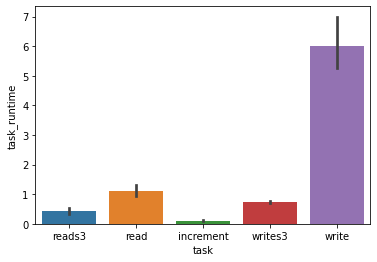

In [15]:
fig_io("../results/ec2-t2medium/conditions-dask/rep-*/benchmark_5i_1f_nocache*")

#### 5 files 5 iterations

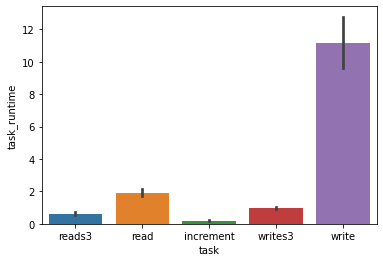

In [16]:
fig_io("../results/ec2-t2medium/conditions-dask/rep-*/benchmark_5i_5f_nocache*")

#### 10 files 5 iterations

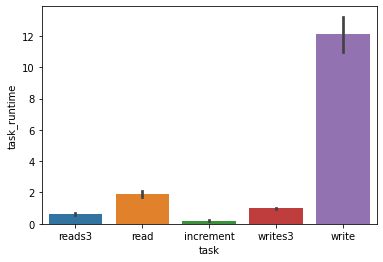

In [17]:
fig_io("../results/ec2-t2medium/conditions-dask/rep-*/benchmark_5i_10f_nocache*")